In [27]:
#importing dependencies 

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key

In [28]:
#importing csv files
categories = ['INCAFTTX', 'HOUSING', 'FOODHOME', 'FOODAWAY', 'HEALTH', 'ALCBEVG', 'APPAREL', 'TRANS', 'ENTRTAIN']
filepath = "Resources/Item_Codes.csv"
item_codes_df = pd.read_csv(filepath)
item_codes_df

for category in categories:
    expense_df = item_codes_df[item_codes_df["ITEM CODE"]==category]

expense_df

,SUB CATEGORY CODE,ITEM CODE,DESCRIPTION
18,ENTRTAIN,ENTRTAIN,Entertainment


In [29]:
# A single BLS API query can take up to 50 series ID at once. Since there are 153 item codes, 
# we created 4 nested lists of series IDs to request expenditure all item codes in 4 separate API queries
seriesids = [[],[],[],[]]

# Row counts tracks the limit of 50 elements per list. Set count tracks which nest list we're appending to.
setcount = 0
rowcount = 0

# Iterate through each row in the item_codes_df DataFrame
for index,row in item_codes_df.iterrows():
    # Move to the next nested series id list if the rowcount exceeds the API query limit of 50
    if rowcount == 50:
        setcount = setcount + 1
        rowcount = 0
    
    # Use the Item Code value in the DataFrame to modify the series ID and append the value to the list
    seriesids[setcount].append(f'CXU{row["ITEM CODE"]}LB0101M')
    
    # Iterate row count
    rowcount = rowcount + 1 
    
len(seriesids)

4

In [30]:
# Define header to post HTTP request
headers = {'Content-type': 'application/json'}

# Create a list to store the output of each API query
json_data = []

# Loop through the nested series ids to request up to 50 series IDs API per query
for i in range(len(seriesids)):
    data = json.dumps({"seriesid": seriesids[i],"startyear":"2010", "endyear":"2011","registrationkey":api_key})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data.append(json.loads(p.text))

In [34]:
# This cell is used to test accessing the elements stored in the bls json reponse
json_data[1]["Results"]['series']

[{'seriesID': 'CXUSWEETSLB0101M',
  'data': [{'year': '2011',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '144',
    'footnotes': [{}]},
   {'year': '2010',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '132',
    'footnotes': [{}]}]},
 {'seriesID': 'CXUDRUGSLB0101M',
  'data': [{'year': '2011',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '489',
    'footnotes': [{}]},
   {'year': '2010',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '485',
    'footnotes': [{}]}]},
 {'seriesID': 'CXUHEALTHLB0101M',
  'data': [{'year': '2011',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '3313',
    'footnotes': [{}]},
   {'year': '2010',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '3157',
    'footnotes': [{}]}]},
 {'seriesID': 'CXUHLTHINSRLB0101M',
  'data': [{'year': '2011',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '1922',
    'footnotes': [{}]},
   {'year': '2010',
    'period

In [32]:
# Initialize set and row count with the same meaning as above
rowcount = 0
setcount = 0

# Initialize lists that will be used as columns in the new DataFrame 
item_year = []
item_value = []
item_cat = []
item_desc = []

for i in range(len(item_codes_df)):
    if rowcount == 50:
        setcount = setcount + 1
        rowcount = 0
    
    # Iterate through the number of years in the API query
    for j in range(len(json_data[1]["Results"]['series'][22]['data'])):
        
        # Attempts to return the year and value from the json API reponse
        try:
            item_year.append(json_data[setcount]["Results"]['series'][rowcount]['data'][j]['year'])
            item_value.append(float(json_data[setcount]["Results"]['series'][rowcount]['data'][j]['value']))
            item_cat.append(item_codes_df.iloc[i,0])
            item_desc.append(item_codes_df.iloc[i,2])
        # If fails, add a null value to the list (all lists need to be the same size when creating the DataFrame)
        except:
            print(f"Item {i} doesn't have data")
        
        # Create list for item category and item description for the new DataFrame
        
        
    # Iterate row count
    rowcount = rowcount + 1
 
# Create new DataFrame with one column for year
item_data_df = pd.DataFrame({"Category": item_cat,
                             "Item":item_desc,
                             "Year": item_year,
                             "Value": item_value
})

item_data_df

Item 20 doesn't have data
Item 20 doesn't have data
Item 22 doesn't have data
Item 22 doesn't have data
Item 24 doesn't have data
Item 24 doesn't have data
Item 57 doesn't have data
Item 57 doesn't have data
Item 80 doesn't have data
Item 80 doesn't have data
Item 91 doesn't have data
Item 91 doesn't have data
Item 114 doesn't have data
Item 114 doesn't have data
Item 134 doesn't have data
Item 134 doesn't have data
Item 135 doesn't have data
Item 135 doesn't have data
Item 136 doesn't have data
Item 136 doesn't have data
Item 137 doesn't have data
Item 137 doesn't have data
Item 138 doesn't have data
Item 138 doesn't have data


,Category,Item,Year,Value
0,ALCBEVG,Alcoholic beverages,2011,456.0
1,ALCBEVG,Alcoholic beverages,2010,412.0
2,APPAREL,Apparel and services,2011,1740.0
3,APPAREL,Apparel and services,2010,1700.0
4,APPAREL,"Apparel, Boys, 2 to 15",2011,80.0
...,...,...,...,...
279,TRANS,Other vehicle expenses,2010,2464.0
280,TRANS,Vehicle purchases (net outlay),2011,2669.0
281,TRANS,Vehicle purchases (net outlay),2010,2588.0
282,TRANS,"Vehicle. rent., leas., licen., oth. charges",2011,433.0


In [33]:
# cat_df = item_data_df.groupby([item_cat])
# cat_sum = cat_df["Value"].sum()
# plt.pie(cat_sum,labels=cat_sum.index)
# plt.show()
# cat_sum = cat_df["Value"].sum()
# total = cat_sum.sum()
# print(cat_sum/total*100)
print(item_data_df[item_data_df["Category"]=="APPAREL"])

   Category                                 Item  Year   Value
2   APPAREL                 Apparel and services  2011  1740.0
3   APPAREL                 Apparel and services  2010  1700.0
4   APPAREL               Apparel, Boys, 2 to 15  2011    80.0
5   APPAREL               Apparel, Boys, 2 to 15  2010    78.0
6   APPAREL                             Footwear  2011   321.0
7   APPAREL                             Footwear  2010   303.0
8   APPAREL              Apparel, Girls, 2 to 15  2011   117.0
9   APPAREL              Apparel, Girls, 2 to 15  2010   101.0
10  APPAREL            Apparel, Children under 2  2011    68.0
11  APPAREL            Apparel, Children under 2  2010    91.0
12  APPAREL                Apparel, Men and boys  2011   404.0
13  APPAREL                Apparel, Men and boys  2010   382.0
14  APPAREL            Apparel, Men, 16 and over  2011   324.0
15  APPAREL            Apparel, Men, 16 and over  2010   304.0
16  APPAREL  Other apparel products and services  2011 

In [47]:
series_dict = {
    'CXUFOODAWAYLB1101M': 'FoodAway_AllRegions',
    'CXUAPPARELLB1101M': 'Apparel_AllRegions',
    'CXUENTRTAINLB1101M': 'Entertainment_AllRegions'}
series_list = list(series_dict.keys())
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": list(series_dict.keys()),"startyear":"2005", "endyear":"2014","registrationkey":api_key})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [48]:
json_data['Results']['series']

[{'seriesID': 'CXUFOODAWAYLB1101M',
  'data': [{'year': '2014',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '2787',
    'footnotes': [{}]},
   {'year': '2013',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '2625',
    'footnotes': [{}]},
   {'year': '2012',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '2678',
    'footnotes': [{}]},
   {'year': '2011',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '2620',
    'footnotes': [{}]},
   {'year': '2010',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '2505',
    'footnotes': [{}]},
   {'year': '2009',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '2619',
    'footnotes': [{}]},
   {'year': '2008',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '2698',
    'footnotes': [{}]},
   {'year': '2007',
    'period': 'A01',
    'periodName': 'Annual',
    'value': '2668',
    'footnotes': [{}]},
   {'year': '2006',
    'period': 'A01',
   

In [42]:
try:
    df = pd.DataFrame()
    for series in json_data['Results']['series']:
        df_initial = pd.DataFrame(series)
        series_col = df_initial['seriesID'][0]
        for i in range(0, len(df_initial) - 1):
            df_row = pd.DataFrame(df_initial['data'][i])
            df_row['seriesID'] = series_col
            if 'code' not in str(df_row['footnotes']): 
                df_row['footnotes'] = ''
            else:
                df_row['footnotes'] = str(df_row['footnotes']).split("'code': '",1)[1][:1]
            df = df.append(df_row, ignore_index=True)
    df.to_csv('blsdata.csv', index=False)
except:
    json_data['status'] == 'REQUEST_NOT_PROCESSED'
    print('BLS API has given the following Response:', json_data['status'])
    print('Reason:', json_data['message'])

df

,year,period,periodName,value,footnotes,seriesID
0,2014,A01,Annual,2787,,CXUFOODAWAYLB1101M
1,2013,A01,Annual,2625,,CXUFOODAWAYLB1101M
2,2012,A01,Annual,2678,,CXUFOODAWAYLB1101M
3,2011,A01,Annual,2620,,CXUFOODAWAYLB1101M
4,2010,A01,Annual,2505,,CXUFOODAWAYLB1101M
5,2009,A01,Annual,2619,,CXUFOODAWAYLB1101M
6,2008,A01,Annual,2698,,CXUFOODAWAYLB1101M
7,2007,A01,Annual,2668,,CXUFOODAWAYLB1101M
8,2006,A01,Annual,2694,,CXUFOODAWAYLB1101M
9,2014,A01,Annual,1786,,CXUAPPARELLB1101M


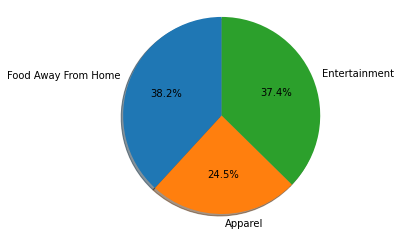

['CXUFOODAWAYLB1101M', 'CXUAPPARELLB1101M', 'CXUENTRTAINLB1101M']


In [50]:
series_value = df.groupby('seriesID')['value']
total_foodaway = series_value.sum()["CXUFOODAWAYLB1101M"]
total_foodaway = int(total_foodaway)
total_foodaway
total_apparel = series_value.sum()["CXUAPPARELLB1101M"]
total_apparel = int(total_apparel)
total_apparel
total_ent = series_value.sum()["CXUENTRTAINLB1101M"]
total_ent = int(total_ent)
total_ent
labels = 'Food Away From Home', 'Apparel', 'Entertainment'
sizes = [total_foodaway, total_apparel, total_ent]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Apparel')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [45]:
df.plot(kind='line',x='year',y='value')
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

TypeError: no numeric data to plot